# Lab_21_Module_2_Time_Series_Models

In [59]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess




df = pd.read_excel(r'C:\Users\Mtime\OneDrive\Bureau\airlines.xlsx')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, the dates are formatted as year–month. We also see that the data starts in the year 1949. The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data

In [6]:
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. This will allow it to programmatically pull time values like the year or month for each record. To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [7]:
pd.to_datetime(df['Month'])

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

The next thing we can do is convert the month column to an index.



In [8]:
df.set_index('Month')

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

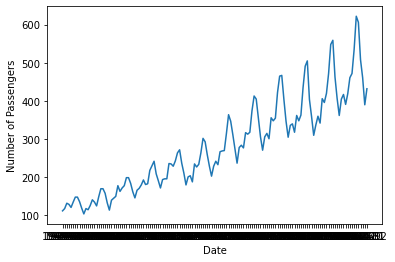

In [9]:
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(df['Month'], df['Passengers'])

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.



In [10]:
from statsmodels.tsa.stattools import adfuller


Let’s pass our data frame into the adfuller method. Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion



In [11]:
result = adfuller(df['Passengers'])


Store our results in a dataframe display it



In [12]:
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : 0.8153688792060497
p-value : 0.991880243437641
Valeurs Critiques :
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


Explain the results



In [13]:
# here we have a p_value greater than 5%, so we can say that the time series data is stationnary
# ADF is far from the critique value

Autocorrelation Checking for autocorrelation in time series data is another important part of the analytic process. This is a measure of how correlated time series data is at a given point in time with past values, which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well. Please calculate and show the autocorrelation

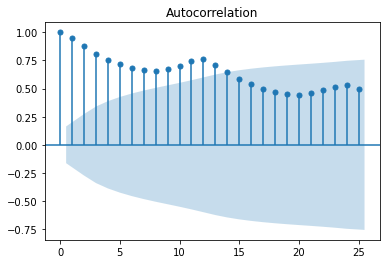

In [14]:

plot_acf(df['Passengers'],lags=25)
plt.show()

In [15]:
# the  FIRST 13 lags are greater than  the  confidence interval so tey are statistically significant.


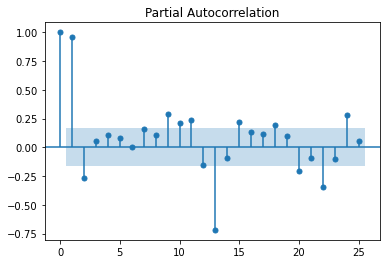

In [16]:
plot_pacf(df['Passengers'],lags=25)
plt.show()

In [17]:
# the 2 first lags are greater than confidence interval, so we can say that are statistically significant.

Decomposition Trend decomposition is another useful way to visualize the trends in time series data. To proceed, let’s import seasonal_decompose from the statsmodels package: from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


Next, let’s pass our data frame into the seasonal_decompose method and plot the result: decompose = decompose.plot() plt.show()

C:\Users\Mtime\AppData\Local\Temp/ipykernel_20848/1975430102.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result= sm.tsa.seasonal_decompose(df['Passengers'], freq=60)


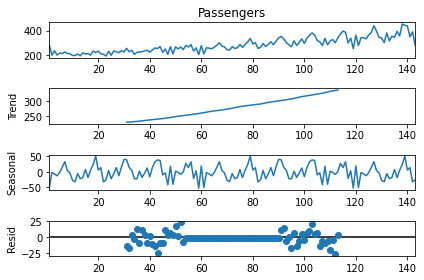

In [29]:
#decomposition = sm.tsa.seasonal_decompose(df['Passengers'], freq = 60) 
#decomposition.plot
#plt.show()
result= sm.tsa.seasonal_decompose(df['Passengers'], freq=60)
result.plot()
plt.show()

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary



In [20]:
df['Difference'] = df['Passengers'].diff()
df = df.drop(df.index[0])
df.head()

,Month,Passengers,Difference
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0
5,1949-06,135,14.0


MA(1)

In [35]:
import numpy as np
df['Diff_log'] = np.log(df['Passengers']) 
df.head()

,Month,Passengers,Difference,Diff_log
1,1949-02,281.993347,6.0,5.641883
2,1949-03,200.044079,14.0,5.298538
3,1949-04,236.674316,-3.0,5.466685
4,1949-05,201.346423,-8.0,5.305027
5,1949-06,217.827473,14.0,5.383703


In [36]:
#Ad fuller to check stationary with Diff method
result = adfuller(df.Diff_log)

print('ADF Test Statistic: %.2f' % result[0]) #critical value from statistics
print('5%% Critical Value: %.2f' % result[4]['5%']) # critical value from table
print('p-value: %.2f' % result[1])#Ad fuller to check stationary with Diff method
result = adfuller(df.Difference)



ADF Test Statistic: -0.43
5% Critical Value: -2.88
p-value: 0.90


In [37]:
#Ad fuller to check stationary with Diff method
result = adfuller(df.Difference)

print('ADF Test Statistic: %.2f' % result[0]) #critical value from statistics
print('5%% Critical Value: %.2f' % result[4]['5%']) # critical value from table
print('p-value: %.2f' % result[1])#Ad fuller to check stationary with Diff method
result

ADF Test Statistic: -2.83
5% Critical Value: -2.88
p-value: 0.05


(-2.8292668241699963,
 0.05421329028382592,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

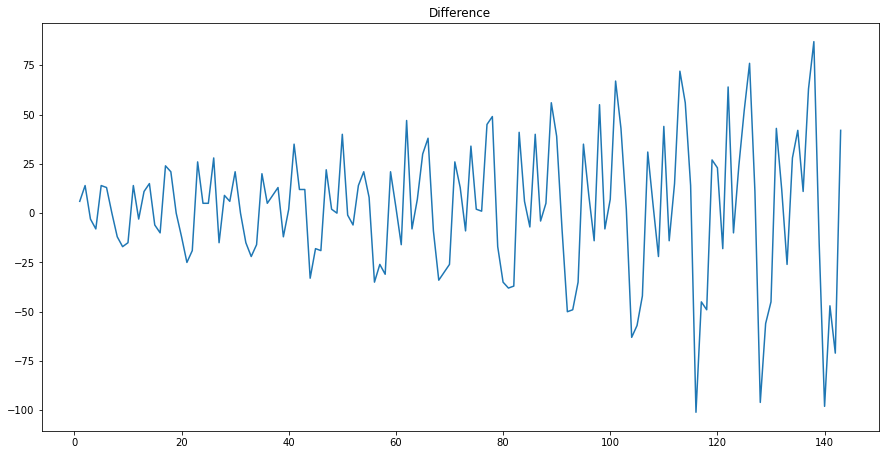

In [39]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(df['Difference'])
plt.title("Difference")
plt.show()

Split DATA

In [42]:
#we need to split our data (the difference column) to try our model
X = df.Difference
split = 2*round(len(X) / 3)

train,  test =X[0:split], X[split:]  # split the data in 2 subsets to check that our means and variances are not the same

#train = 96
# test = 47

 AR(1)

In [44]:
# We try a model called Moving average MA --> MA(1) means the order = (0,1) and MA(2) means the order = (0,2)
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train.dropna(), order=(0,1))  #We do the model with the train
result = model.fit()

C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Display the Output

In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Difference   No. Observations:                   96
Model:                     ARMA(0, 1)   Log Likelihood                -432.980
Method:                       css-mle   S.D. of innovations             21.987
Date:                Sun, 23 Jan 2022   AIC                            871.961
Time:                        02:36:30   BIC                            879.654
Sample:                             0   HQIC                           875.071
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0768      3.084      0.673      0.501      -3.968       8.122
ma.L1.Difference     0.3782      0.116      3.270      0.001       0.151       0.605
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.6444           +0.0000j            2.6444            0.5000
-----------------------------------------------------------------------------
"""

In [48]:
model.predict(test)

array([-14.        , -13.63648381, -13.49751853, -13.80913603,
       -13.89437934, -13.49282947, -13.51831219, -13.75421251,
       -13.96810523, -14.05512536, -14.01717954, -13.49059674,
       -13.80926188, -13.54892251, -13.48092868, -13.86398311,
       -13.92974576, -13.31036826, -13.37617512, -13.75679682,
       -13.96805824, -14.20058076, -14.08726217, -13.27114069,
       -13.66779744, -13.6605855 , -13.24253481, -14.03195391,
       -13.5812372 , -13.64397751, -13.3701095 , -13.7569071 ,
       -14.02260169, -14.14504361, -14.03372648, -13.38120497,
       -13.66579627, -13.58789461, -13.51658373, -13.97242575,
       -13.70959226, -13.11437105, -13.54337507, -13.535575  ,
       -14.35389864, -14.06629275, -14.08970377, -13.34382357,
       -13.72102139, -13.75052688, -13.02271769, -13.78140513,
       -13.85851991, -13.49348146, -13.37284579, -13.6114028 ,
       -14.38888359, -14.21111121, -14.30525252, -13.35808632,
       -13.70258025, -14.04177127, -12.89014961, -13.91

In [49]:
#we need to compare the test 
test

97     -14.0
98      55.0
99      -8.0
100      7.0
101     67.0
102     43.0
103      2.0
104    -63.0
105    -57.0
106    -42.0
107     31.0
108      4.0
109    -22.0
110     44.0
111    -14.0
112     15.0
113     72.0
114     56.0
115     14.0
116   -101.0
117    -45.0
118    -49.0
119     27.0
120     23.0
121    -18.0
122     64.0
123    -10.0
124     24.0
125     52.0
126     76.0
127     11.0
128    -96.0
129    -56.0
130    -45.0
131     43.0
132     12.0
133    -26.0
134     28.0
135     42.0
136     11.0
137     63.0
138     87.0
139    -16.0
140    -98.0
141    -47.0
142    -71.0
143     42.0
Name: Difference, dtype: float64

MA(2)

In [50]:
model = ARMA(train.dropna(), order=(0,2))
result = model.fit()

C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

In [56]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Difference   No. Observations:                   96
Model:                     ARMA(0, 2)   Log Likelihood                -431.089
Method:                       css-mle   S.D. of innovations             21.534
Date:                Sun, 23 Jan 2022   AIC                            870.179
Time:                        02:39:38   BIC                            880.436
Sample:                             0   HQIC                           874.325
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9912      2.168      0.919      0.358      -2.258       6.240
ma.L1.Difference     0.2857      0.125      2.286      0.022       0.041       0.531
ma.L2.Difference    -0.3027      0.164     -1.844      0.065      -0.624       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4058           +0.0000j            1.4058            0.5000
MA.2            2.3496           +0.0000j            2.3496            0.0000
-----------------------------------------------------------------------------
"""

In [57]:
# Try a AR(2) model
model = ARMA(train, order=(2, 0))
result = model.fit

C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

In [68]:
#ARMA(AR, MA) = ARMA(2,2)
simulated_ARMA_df = ArmaProcess(df['Difference'], ma1)

AttributeError: 'Series' object has no attribute 'Difference'

In [65]:
#ARIMA()
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Passengers'],order=(2,1,2))  #I is the number of columns
model_fit=model.fit()
model_fit.summary()

C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Sun, 23 Jan 2022   AIC                           1344.043
Time:                        02:47:49   BIC                           1361.820
Sample:                             1   HQIC                          1351.267
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.Passengers    -1.9098      0.065    -29.511      0.000      -2.037      -1.783
ma.L2.D.Passengers     0.9996      0.068     14.808      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2965j            1.0002           -0.0479
MA.2            0.9552           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""